In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [17]:
sc=StandardScaler()

In [18]:
bf=data = pd.read_csv('BlackFriday.csv')

In [19]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [20]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
missing_values = bf.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/bf.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.672659
Product_Category_2    31.566643
dtype: float64 %


In [22]:
bf.fillna(0,inplace=True)

In [23]:
bf['Age']=bf['Age'].apply(lambda x: 1 if x=='0-17' else( 2 if x=='18-25' else(3 if x in ('26-35','36-45') else (4 if x in ('46-50','51-55','55+') else x ) )))

In [24]:
bf=pd.get_dummies(data=bf,columns=['Gender','City_Category'],drop_first=True)

In [25]:
bf["Stay_In_Current_City_Years"]=bf["Stay_In_Current_City_Years"].apply(lambda x: str(x).replace("+","") if "+" in x else x)
bf["Stay_In_Current_City_Years"]=bf["Stay_In_Current_City_Years"].apply(lambda x: int(x))

In [26]:
bf.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C
0,1000001,P00069042,1,10,2,0,3,0.0,0.0,8370,0,0,0
1,1000001,P00248942,1,10,2,0,1,6.0,14.0,15200,0,0,0
2,1000001,P00087842,1,10,2,0,12,0.0,0.0,1422,0,0,0
3,1000001,P00085442,1,10,2,0,12,14.0,0.0,1057,0,0,0
4,1000002,P00285442,4,16,4,0,8,0.0,0.0,7969,1,0,1


In [27]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Age                           550068 non-null int64
Occupation                    550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
Gender_M                      550068 non-null uint8
City_Category_B               550068 non-null uint8
City_Category_C               550068 non-null uint8
dtypes: float64(2), int64(7), object(1), uint8(3)
memory usage: 43.5+ MB


In [28]:
bf.drop(columns=['User_ID','Product_ID'],inplace=True)

In [29]:
from scipy.stats import zscore
X_scaled = bf.apply(zscore)

In [30]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,6.050748e+06
1,2,5.314795e+06
2,3,4.855738e+06
3,4,4.548445e+06
4,5,4.312846e+06
5,6,4.118215e+06
6,7,3.988703e+06
7,8,3.868476e+06
8,9,3.761403e+06
9,10,3.644841e+06


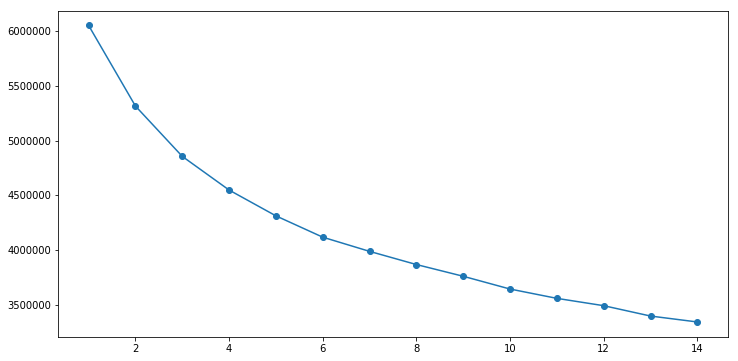

In [31]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

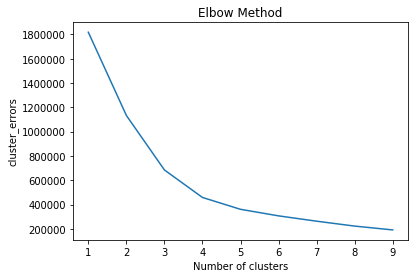

In [34]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
cluster_errors = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X_pca)
    cluster_errors.append(kmeans.inertia_)
plt.plot(range(1,10), cluster_errors)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('cluster_errors')
plt.show()

In [35]:
# Fitting K-Means to the pca model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X_pca)

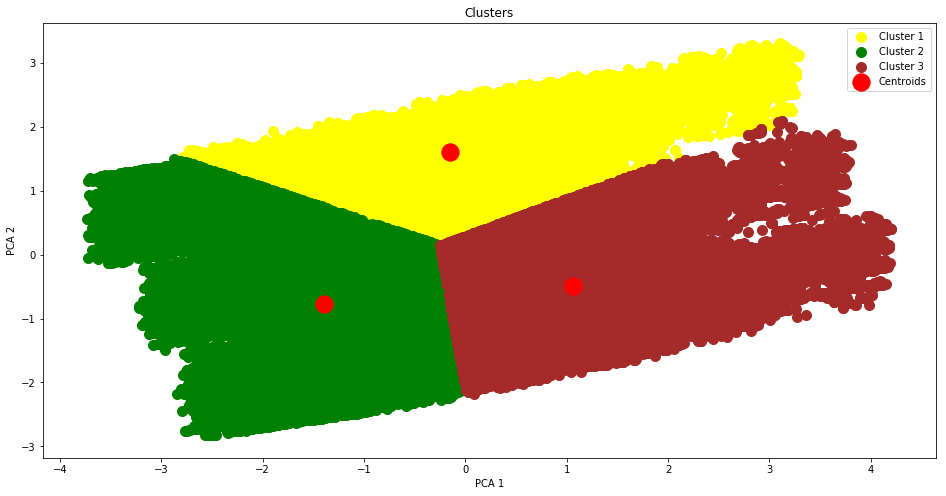

In [36]:
# figure size
plt.figure(figsize=(16,8))
# Visualising the clusters
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'brown', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [37]:
# Fitting K-Means to the pca model
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X_pca)

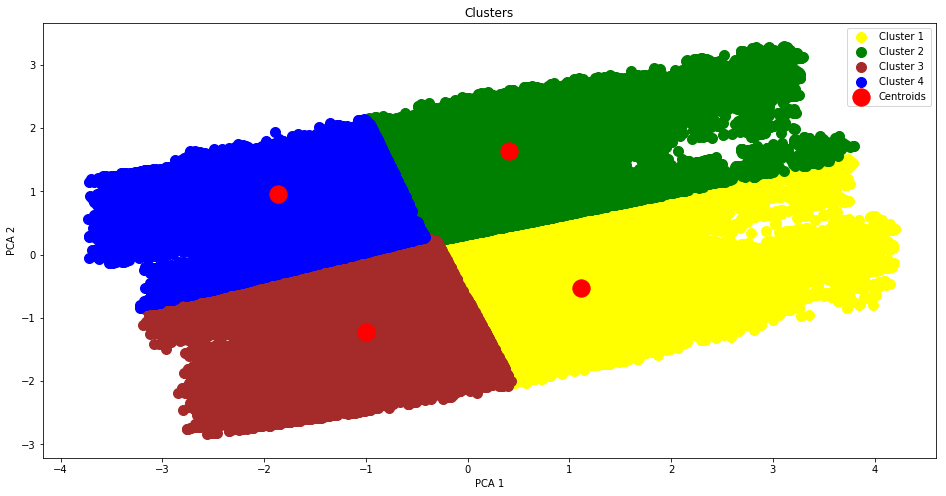

In [38]:
# figure size
plt.figure(figsize=(16,8))
# Visualising the clusters
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'brown', label = 'Cluster 3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [39]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

cluster_labels['labels'] = cluster_labels['labels'].astype('category')

In [40]:
# Joining the label dataframe with the black friday data frame to create bf_labeled.
bf_labeled = X_scaled.join(cluster_labels)

In [42]:
bf_labeled['labels'].unique()

[0, 2, 1, 3]
Categories (4, int64): [0, 2, 1, 3]

In [43]:
bf_clusters = bf_labeled.groupby(['labels'])
df_0=bf_clusters.get_group(0)
df_1=bf_clusters.get_group(1)
df_2=bf_clusters.get_group(2)
df_3=bf_clusters.get_group(3)

In [44]:
new_bf=pd.concat([df_0,df_1,df_2])

In [45]:
new_bf.tail()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C,labels
545902,1.504828,-1.238255,1.660861,1.200454,-0.610809,-0.440100,1.305142,-0.242276,-1.746513,1.174506,-0.672143,2
545904,0.063309,-0.318384,0.109801,-0.833018,0.151346,0.203454,1.625106,1.439169,0.572570,1.174506,-0.672143,2
545907,0.063309,-0.318384,0.109801,-0.833018,-0.864860,-0.600989,0.985178,-1.162432,0.572570,1.174506,-0.672143,2
545908,0.063309,-0.318384,0.109801,-0.833018,-1.118912,-0.761877,1.785088,1.280102,0.572570,1.174506,-0.672143,2
545914,0.063309,-0.318384,0.109801,-0.833018,-1.118912,-0.761877,1.145160,0.473025,0.572570,1.174506,-0.672143,2


In [46]:
new_bf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468491 entries, 0 to 545914
Data columns (total 12 columns):
Age                           468491 non-null float64
Occupation                    468491 non-null float64
Stay_In_Current_City_Years    468491 non-null float64
Marital_Status                468491 non-null float64
Product_Category_1            468491 non-null float64
Product_Category_2            468491 non-null float64
Product_Category_3            468491 non-null float64
Purchase                      468491 non-null float64
Gender_M                      468491 non-null float64
City_Category_B               468491 non-null float64
City_Category_C               468491 non-null float64
labels                        468491 non-null category
dtypes: category(1), float64(11)
memory usage: 43.3 MB


In [47]:
X=new_bf.drop('labels',axis=1)
y=new_bf['labels']

In [48]:
X.columns

Index(['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Gender_M', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [50]:
from sklearn import gaussian_process,linear_model,naive_bayes,neighbors,tree

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, roc_auc_score,precision_score,recall_score,classification_report

In [52]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [53]:
logreg=LogisticRegression().fit(X_train_scaled,y_train)
logreg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
print("Train set score:{:.3f}".format(logreg.score(X_train_scaled,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test_scaled,y_test)))

Train set score:0.993
Test set score:0.993


In [55]:
knn=KNeighborsClassifier().fit(X_train_scaled,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
print("Train set score:{:.3f}".format(knn.score(X_train_scaled,y_train)))
print("Test set score:{:.3f}".format(knn.score(X_test_scaled,y_test)))

Train set score:0.995
Test set score:0.991


In [57]:
NB=GaussianNB().fit(X_train_scaled,y_train)
NB

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
print("Train set score:{:.3f}".format(NB.score(X_train_scaled,y_train)))
print("Test set score:{:.3f}".format(NB.score(X_test_scaled,y_test)))

Train set score:0.926
Test set score:0.926


In [59]:
DT=DecisionTreeClassifier().fit(X_train_scaled,y_train)
DT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
print("Train set score:{:.3f}".format(DT.score(X_train_scaled,y_train)))
print("Test set score:{:.3f}".format(DT.score(X_test_scaled,y_test)))

Train set score:1.000
Test set score:0.995


In [61]:
model = [
    #logisticRegression
    LogisticRegression(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    
    ]
### models chosen for building

In [62]:
Model_columns = []
Model_compare = pd.DataFrame(columns = Model_columns)


row_index = 0
for alg in model:
    
    
    predicted = alg.fit(X_train_scaled, y_train).predict(X_test_scaled)
    Model_name = alg.__class__.__name__
    Model_compare.loc[row_index,'Model Name'] = Model_name
    Model_compare.loc[row_index, 'Model Train Accuracy'] = round(alg.score(X_train_scaled, y_train), 4)
    Model_compare.loc[row_index, 'Model Test Accuracy'] = round(alg.score(X_test_scaled, y_test), 4)
    row_index+=1
       
Model_compare

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,Model Name,Model Train Accuracy,Model Test Accuracy
0,LogisticRegression,0.9931,0.9930
1,KNeighborsClassifier,0.9945,0.9906
2,GaussianNB,0.9262,0.9265
3,DecisionTreeClassifier,1.0000,0.9950


### Since we have the clusters now lets do eda on the clusters to observe the patterns in the clusters

In [64]:
blackfriday=pd.read_csv('BlackFriday.csv')

In [65]:
blackfriday['cluster']=bf_labeled['labels']

In [66]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,cluster
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1


In [67]:
blackfriday.fillna(0,inplace=True)

In [69]:
blackfriday['Age']=blackfriday['Age'].apply(lambda x: 1 if x=='0-17' else( 2 if x=='18-25' else(3 if x in ('26-35','36-45') else (4 if x in ('46-50','51-55','55+') else x ) )))

In [70]:
blackfriday["Stay_In_Current_City_Years"]=blackfriday["Stay_In_Current_City_Years"].apply(lambda x: str(x).replace("+","") if "+" in x else x)
blackfriday["Stay_In_Current_City_Years"]=blackfriday["Stay_In_Current_City_Years"].apply(lambda x: int(x))

In [71]:
blackfriday_clusters = blackfriday.groupby(['cluster'])
cluster_0=blackfriday_clusters.get_group(0)
cluster_1=blackfriday_clusters.get_group(1)
cluster_2=blackfriday_clusters.get_group(2)
cluster_3=blackfriday_clusters.get_group(3)

In [82]:
cluster_0['Purchase'].mean()

6670.798932815911

In [83]:
cluster_1['Purchase'].mean()

7037.870512498955

In [84]:
cluster_2['Purchase'].mean()

12743.677800498197

In [85]:
cluster_3['Purchase'].mean()

13606.616239871533

### We can clearly see that the cluster 3 people tend to purchase the most

In [78]:
cluster_0['City_Category'].value_counts()

B    140470
A     73926
Name: City_Category, dtype: int64

In [79]:
cluster_1['City_Category'].value_counts()

C    99655
A    19955
Name: City_Category, dtype: int64

In [80]:
cluster_2['City_Category'].value_counts()

B    90703
A    43782
Name: City_Category, dtype: int64

In [81]:
cluster_3['City_Category'].value_counts()

C    71520
A    10057
Name: City_Category, dtype: int64

### every cluster has just 2 cities

In [86]:
cluster_0['Age'].value_counts()

3    137910
2     42343
4     29486
1      4657
Name: Age, dtype: int64

In [87]:
cluster_1['Age'].value_counts()

3    61052
4    38617
2    15844
1     4097
Name: Age, dtype: int64

In [88]:
cluster_2['Age'].value_counts()

3    86198
2    28358
4    16607
1     3322
Name: Age, dtype: int64

In [89]:
cluster_3['Age'].value_counts()

3    44440
4    20996
2    13115
1     3026
Name: Age, dtype: int64

### In all clusters maximum people are of age group 3 so we can rely on them and we can see that age group 1 people are least in all clusters so they need include more childern related products

In [90]:
cluster_0['Stay_In_Current_City_Years'].value_counts()

1    75236
3    38339
2    38232
4    31640
0    30949
Name: Stay_In_Current_City_Years, dtype: int64

In [91]:
cluster_1['Stay_In_Current_City_Years'].value_counts()

1    43639
2    22723
4    19618
3    18835
0    14795
Name: Stay_In_Current_City_Years, dtype: int64

In [92]:
cluster_2['Stay_In_Current_City_Years'].value_counts()

1    46572
2    25301
3    24526
4    20050
0    18036
Name: Stay_In_Current_City_Years, dtype: int64

In [93]:
cluster_3['Stay_In_Current_City_Years'].value_counts()

1    28374
2    15582
3    13585
4    13418
0    10618
Name: Stay_In_Current_City_Years, dtype: int64

### Most of the new comers are in cluster 0.They should target this cluster more because the purchase amount also is less in this cluster

In [105]:
cluster_0['Occupation'].value_counts().head(1)

4    32555
Name: Occupation, dtype: int64

In [96]:
cluster_1['Occupation'].value_counts().head(1)

0    13417
Name: Occupation, dtype: int64

In [97]:
cluster_2['Occupation'].value_counts().head(1)

4    20786
Name: Occupation, dtype: int64

In [98]:
cluster_3['Occupation'].value_counts().head(1)

7    9746
Name: Occupation, dtype: int64

### we can see major domination of the occupation 4 people and give them more recommendations

In [107]:
cluster_0.groupby('Product_Category_1')['Purchase'].sum()

Product_Category_1
1      28829754
2      14516581
3      32980725
4      15447234
5     535704490
6      32773024
7      24116158
8     498191105
9       1764453
10     12025382
11     71094022
12      3214869
13      2478551
14     11718032
15     51629419
16     84310834
17      3338119
18      5609218
19        25229
20       425409
Name: Purchase, dtype: int64

### Cluster 0 maximum revenue is generated by product_category 5

In [112]:
cluster_1.groupby('Product_Category_1')['Purchase'].sum()

Product_Category_1
1      14125556
2       8443326
3      21158095
4       8262119
5     292486379
6      20259383
7      12813466
8     289958426
9       1169606
10     13039467
11     41266363
12      2116975
13      1530050
14      8296664
15     39289009
16     60809778
17      2540580
18      3680983
19        34149
20       519318
Name: Purchase, dtype: int64

### Cluster 1 maximum revenue is generated by product_category 5

In [116]:
cluster_2.groupby('Product_Category_1')['Purchase'].sum()

Product_Category_1
1     1115924764
2      155732723
3       95636663
4        2557722
5       73417423
6      166062262
7       16831309
8       40095135
9        2010896
10      43523942
11        898417
15       1142253
Name: Purchase, dtype: int64

### Cluster 2 maximum revenue is generated by product_category 1

In [118]:
cluster_3.groupby('Product_Category_1')['Purchase'].sum()

Product_Category_1
1     751133680
2      89823556
3      54309230
4       1113413
5      40226937
6     105055633
7       7135798
8      26074133
9       1425369
10     32248510
11       532313
15       908361
Name: Purchase, dtype: int64

### Cluster 3 maximum revenue is generated by product_category 1

In [119]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,y_train)
test_pred=clf.predict(X_test)
train_pred=clf.predict(X_train)

In [120]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render('plot')
graphviz.Source(dot_data).view()

'Source.gv.pdf'

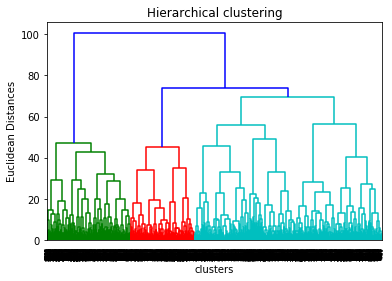

In [127]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X[:5000], method = 'ward'),labels=None)
plt.title('Hierarchical clustering')
plt.xlabel('clusters')
plt.ylabel('Euclidean Distances')
plt.show()